In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import mahotas as mh

In [3]:
DATA_DIR = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired'

In [4]:
z = 560
img = '000000_000000_000'+str(z)+'_000000.tif'

In [5]:
z_img = mh.imread(os.path.join(DATA_DIR,img))

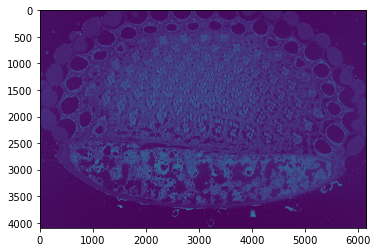

In [6]:
imshow(z_img)

In [7]:
z_img_cropped = z_img.copy()[1500:2000, 2500:4000]

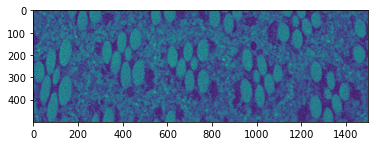

In [8]:
imshow(z_img_cropped)

In [9]:
# load ten images
slices = []
for z in range(550,560):
    img = '000000_000000_000'+str(z)+'_000000.tif'
    z_img = mh.imread(os.path.join(DATA_DIR,img))
    z_img_cropped = z_img[1500:2000, 2500:4000].astype(np.float)
    z_img_cropped /= z_img_cropped.max()
    z_img_cropped *= 255
    slices.append(z_img_cropped)

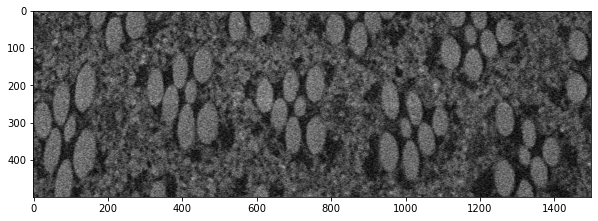

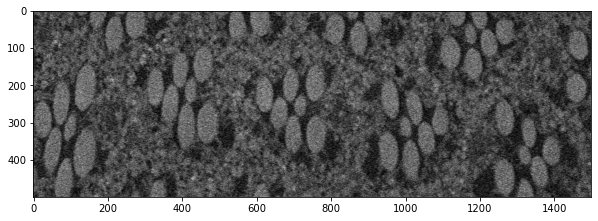

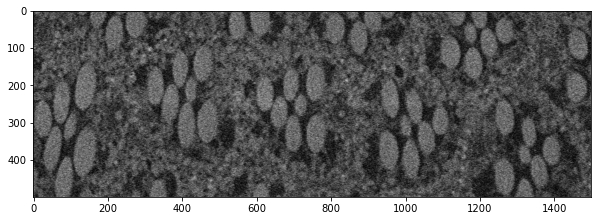

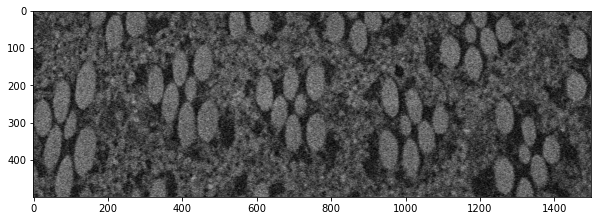

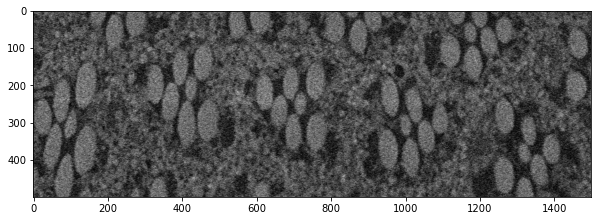

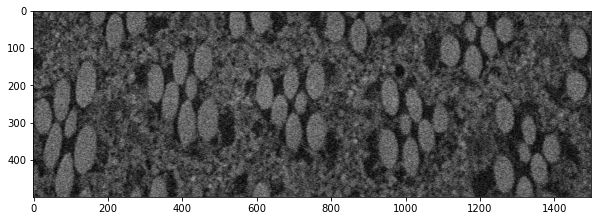

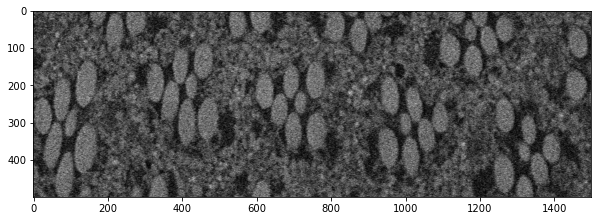

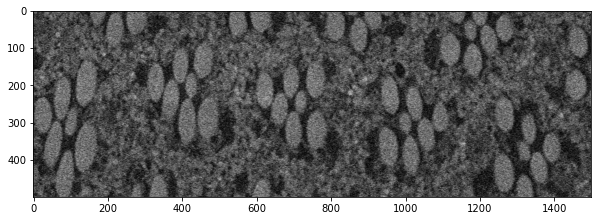

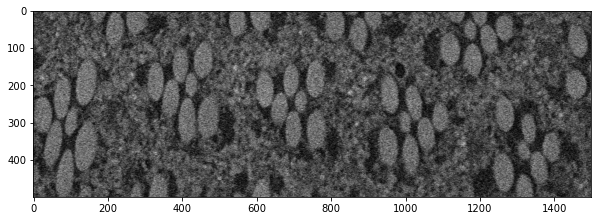

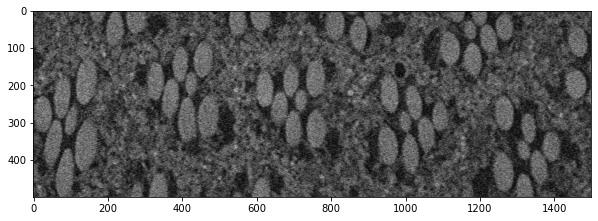

In [10]:
for s in slices:
    plt.figure(figsize=(10,10))
    imshow(s, cmap='gray')

In [11]:
z_img_cropped = z_img_cropped.astype(np.float)
z_img_cropped /= z_img_cropped.max()
z_img_cropped *= 255

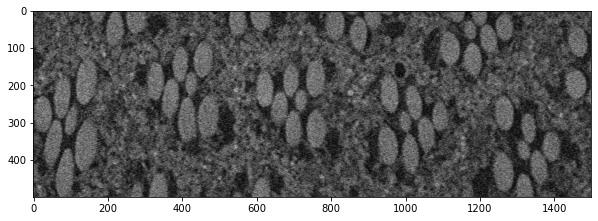

In [12]:
plt.figure(figsize=(10, 10))
imshow(z_img_cropped, cmap='gray')

In [13]:
z_img_cropped.max()

255.0

In [14]:
z_img_stretched = mh.stretch(z_img_cropped)

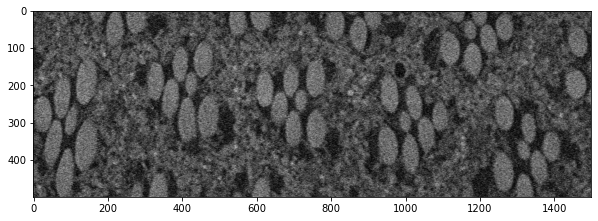

In [15]:
plt.figure(figsize=(10, 10))
imshow(z_img_stretched, cmap='gray')

In [16]:
a = z_img_stretched.copy()

In [17]:
a.max()

255

In [18]:
a.min()

0

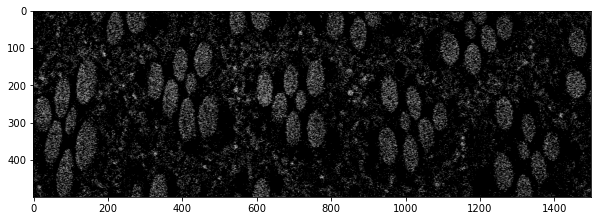

In [19]:
a = z_img_stretched.copy()
a[a<120] = 0 # TODO
plt.figure(figsize=(10, 10))
imshow(a, cmap='gray')

In [20]:
a.max()

255

In [21]:
a.min()

0

In [22]:
# a = z_img_stretched.copy()
labeled, number  = mh.label(a)

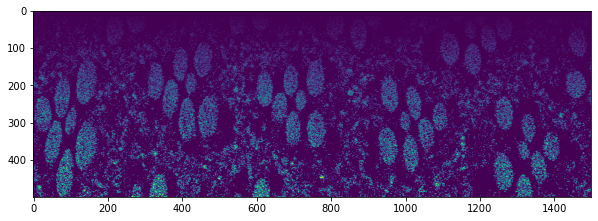

In [23]:
plt.figure(figsize=(10, 10))
imshow(labeled)

In [24]:
labeled.max()

28562

In [25]:
sizes = mh.labeled.labeled_size(labeled)
for i in range(len(sizes)):
    print("Size of region " + str(i) + " : " + str(sizes[i]))

Size of region 0 : 649650
Size of region 1 : 5
Size of region 2 : 3
Size of region 3 : 1
Size of region 4 : 8
Size of region 5 : 7
Size of region 6 : 1
Size of region 7 : 7
Size of region 8 : 3
Size of region 9 : 3
Size of region 10 : 3
Size of region 11 : 1
Size of region 12 : 1
Size of region 13 : 1
Size of region 14 : 2
Size of region 15 : 1
Size of region 16 : 6
Size of region 17 : 1
Size of region 18 : 30
Size of region 19 : 1
Size of region 20 : 3
Size of region 21 : 6
Size of region 22 : 1
Size of region 23 : 9
Size of region 24 : 2
Size of region 25 : 1
Size of region 26 : 1
Size of region 27 : 1
Size of region 28 : 1
Size of region 29 : 3
Size of region 30 : 2
Size of region 31 : 1
Size of region 32 : 13
Size of region 33 : 3
Size of region 34 : 1
Size of region 35 : 5
Size of region 36 : 3
Size of region 37 : 7
Size of region 38 : 36
Size of region 39 : 1
Size of region 40 : 6
Size of region 41 : 9
Size of region 42 : 43
Size of region 43 : 6
Size of region 44 : 13
Size of re

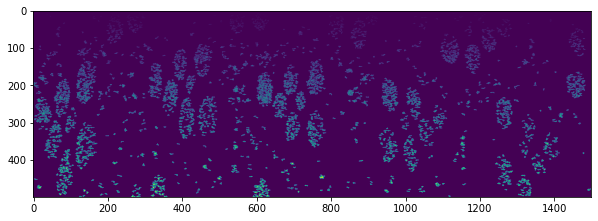

In [26]:
too_small = np.where(sizes < 10)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
plt.figure(figsize=(10,10))
imshow(labeled_only_big)

In [27]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1

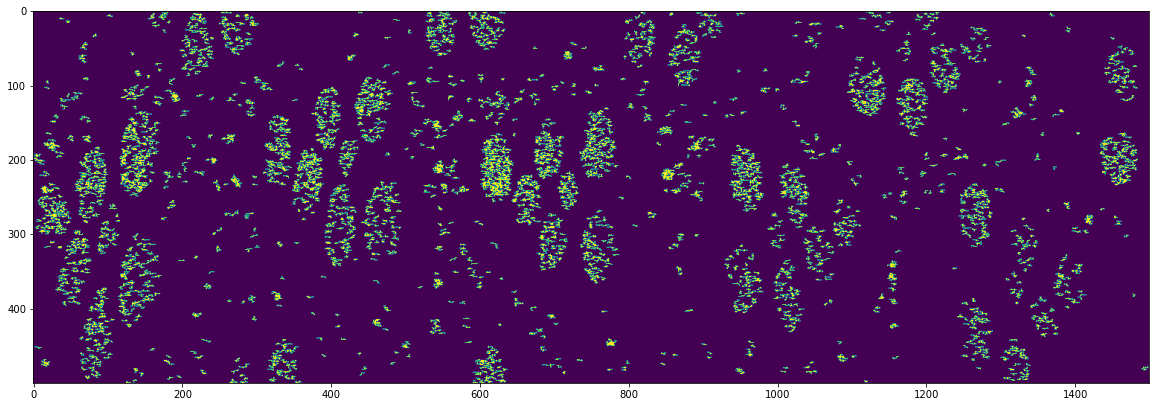

In [28]:
plt.figure(figsize=(20,20))
imshow(binary_mask)

In [29]:
binary_mask_closed = mh.morph.close(binary_mask)

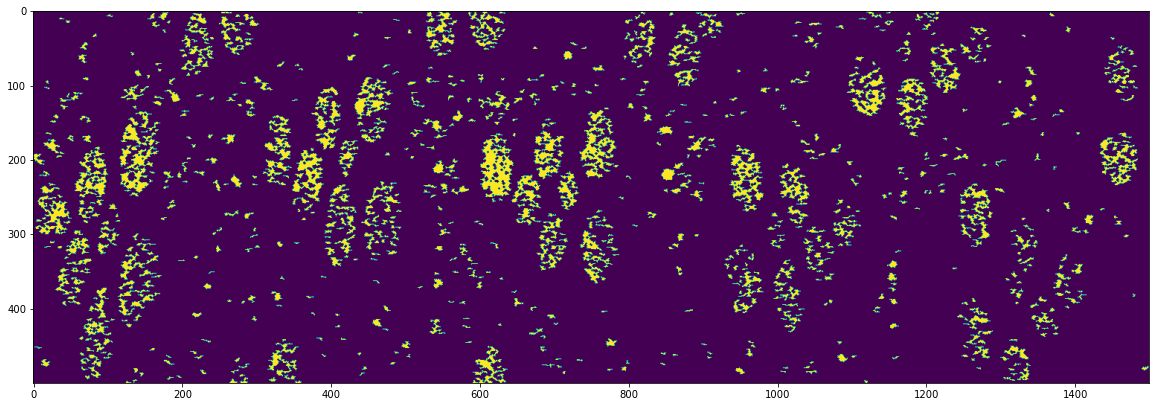

In [30]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [31]:
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

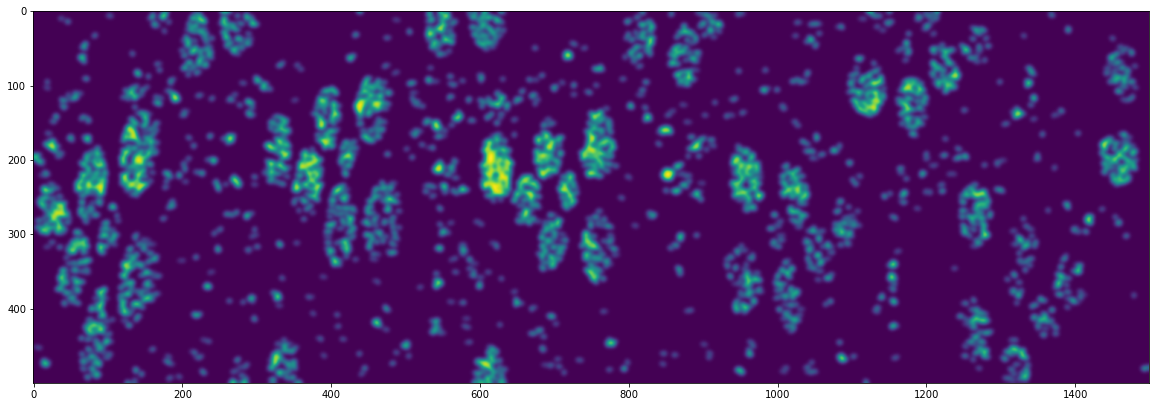

In [32]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed_filtered)

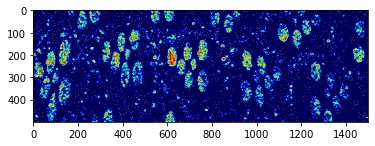

In [33]:
plt.figure()
plt.imshow(a, 'gray', interpolation='none')
plt.imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
plt.show()

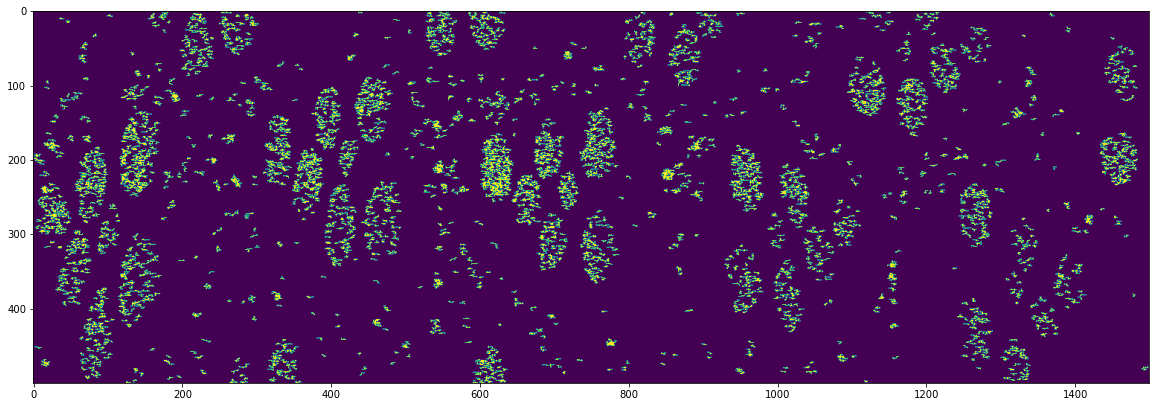

In [34]:
plt.figure(figsize=(20,20))
imshow(binary_mask)

In [35]:
binary_mask_open = binary_mask.copy()

In [36]:
for i in range(5):
    binary_mask_open = mh.morph.close_holes(binary_mask_open)

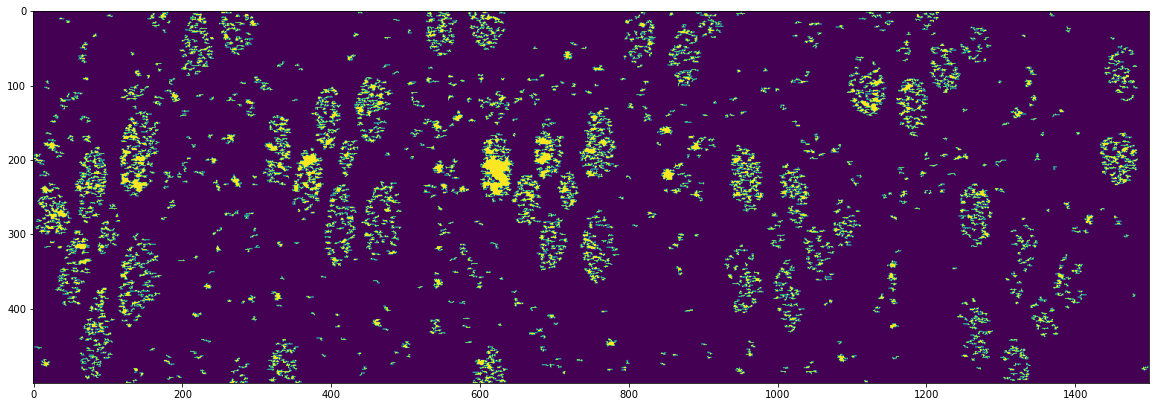

In [37]:
plt.figure(figsize=(20,20))
imshow(binary_mask_open)

In [38]:
binary_mask_open_closed = mh.morph.close(binary_mask_open)

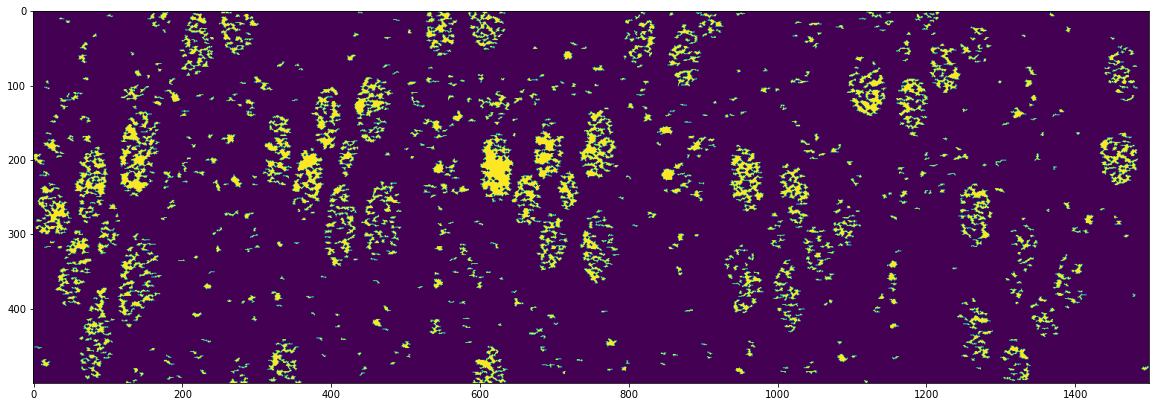

In [39]:
plt.figure(figsize=(20,20))
imshow(binary_mask_open_closed)

In [40]:
for i in range(2):
  binary_mask_open_closed = mh.morph.erode(binary_mask_open_closed)

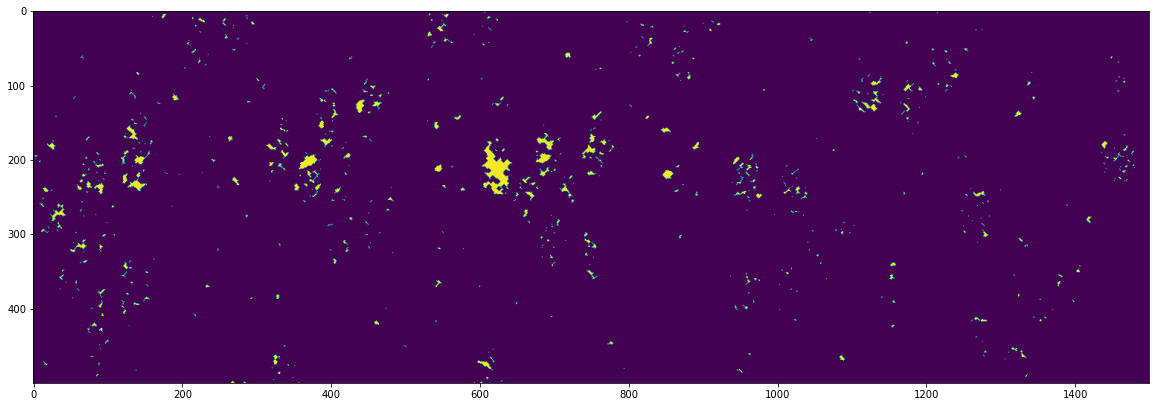

In [41]:
plt.figure(figsize=(20,20))
imshow(binary_mask_open_closed)

In [42]:
for i in range(2):
  binary_mask_open_closed = mh.morph.dilate(binary_mask_open_closed)

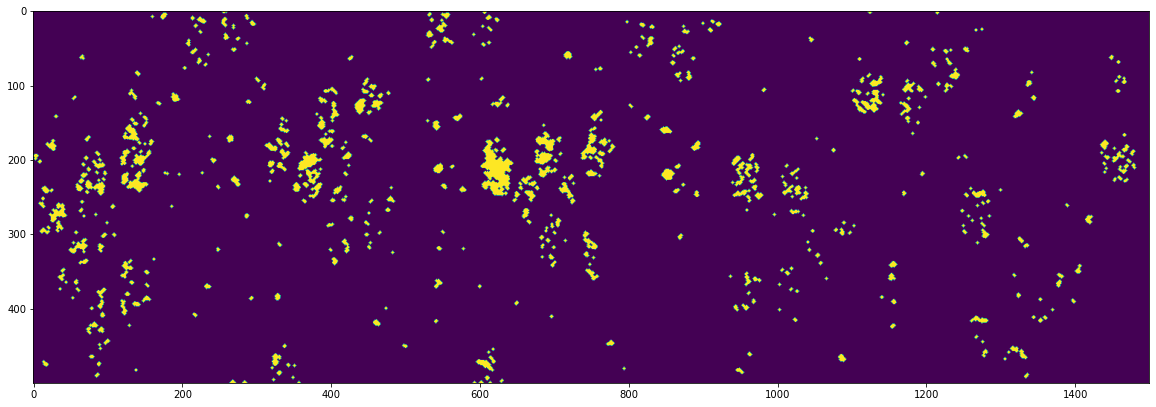

In [43]:
plt.figure(figsize=(20,20))
imshow(binary_mask_open_closed)

In [44]:
sizes = mh.labeled.labeled_size(labeled)


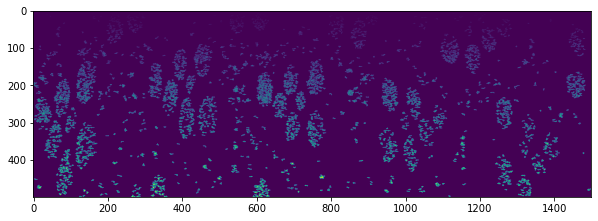

In [45]:
too_small = np.where(sizes < 10)
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)
plt.figure(figsize=(10,10))
imshow(labeled_only_big)

In [46]:
# import numpy as np
# import cv2

# img = cv2.imread('circles.png')

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blurred = cv2.medianBlur(gray, 25) #cv2.bilateralFilter(gray,10,50,50)

# minDist = 100
# param1 = 30 #500
# param2 = 50 #200 #smaller value-> more false circles
# minRadius = 5
# maxRadius = 100 #10

# # docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
# circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

# if circles is not None:
#     circles = np.uint16(np.around(circles))
#     for i in circles[0,:]:
#         cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

# # Show result for testing:
# cv2.imshow('img', img)

In [47]:
import numpy as np
import cv2

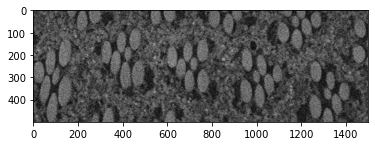

In [48]:
imshow(z_img_cropped, cmap='gray')

In [49]:
i = z_img_cropped.copy()

In [50]:
img = asarray(i)

In [51]:
img.shape

(500, 1500)

In [52]:
img.max()

255.0

In [53]:
img = img.astype(np.uint8)

In [54]:
blurred = cv2.medianBlur(img, 25) #cv2.bilateralFilter(gray,10,50,50)

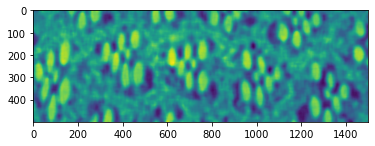

In [55]:
imshow(blurred)

In [ ]:
minDist = 100
param1 = 30 #500
param2 = 50 #200 #smaller value-> more false circles
minRadius = 1
maxRadius = 100 #10

# docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

# Show result for testing:
cv2.imshow('img', img)